## Numpy Array Manipulation 

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import time
from scipy import stats
from scipy.optimize import leastsq
import scipy.optimize as opt
from scipy.stats import norm, poisson
# from scipy.interpolate import BarycentricInterpolator, CubicSpline

import math
#import seaborn

In [2]:
def residual(t, X, y):
    ''' Quadratic function: f(x) = t[0]* x**2 + t[1]* x + t[2] '''
    return y-(t[0]* x**2 + t[1]*x + t[2])

def residual2(t, X, y):
    ''' function: f(x) = t0*sin(t1* x) + t2  '''
    print( t[0], t[1])
    return y-(t[0]* np.sin(t[1]* x) + t[2])

In [3]:
# x ** x        x > 0
# (-x) ** (-x)  x < 0
def f(x):
    y = np.ones_like(x)
    i = x > 0
    y[i] = np.power(x[i], x[i])
    i = x < 0
    y[i] = np.power(-x[i], -x[i])
    return y

## 1. Numpy array

In [7]:
a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [36]:
L = [1,2,3,4,5,6]
print(L)
a = np.array(L)
print(a)
print(a.shape)


b = np.array([[1,2,3,4,], [5,6,7,8],[9,10,11,12]], dtype= np.float)
print(b)
print(b.shape)

f = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.complex)
print(f)    

# change data type
d = b.astype(np.int)
print(d)

[1, 2, 3, 4, 5, 6]
[1 2 3 4 5 6]
(6,)
[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]]
(3, 4)
[[  1.+0.j   2.+0.j   3.+0.j   4.+0.j]
 [  5.+0.j   6.+0.j   7.+0.j   8.+0.j]
 [  9.+0.j  10.+0.j  11.+0.j  12.+0.j]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [33]:

# change shape: 
b.shape= [4,3]
print(b)

# if shape have a dim =-1, will calcualte base on other dim
b.shape =[2,-1]
print(b)

# reshape: create a new array linked to the original array
c= b.reshape((4,-1))
print(c)

# if we change numbers in b, c will also be changed
b[0][1] = 20
print(c)


[[  1.   2.   3.]
 [  4.   5.   6.]
 [  7.   8.   9.]
 [ 10.  11.  12.]]
[[  1.   2.   3.   4.   5.   6.]
 [  7.   8.   9.  10.  11.  12.]]
[[  1.   2.   3.]
 [  4.   5.   6.]
 [  7.   8.   9.]
 [ 10.  11.  12.]]
[[  1.  20.   3.]
 [  4.   5.   6.]
 [  7.   8.   9.]
 [ 10.  11.  12.]]


## 2. Functions

In [43]:
a = np.arange(start= 1, stop= 10, step= 0.5, dtype= float)
a

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [48]:
? np.logspace

In [47]:
b = np.linspace(start =1 , stop=10 , num= 10)
print(b)
c = np.linspace(start =1 , stop=10 , num= 10, endpoint= False)
print(c)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1]


In [55]:
# np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
# Return numbers spaced evenly on a log scale.

d = np.logspace(start = 1, stop= 2, num= 9, endpoint= True)
print(d)

d = np.logspace(start = 0, stop= 10, num= 11, base=2 , endpoint= True, dtype= int)
print(d)

[  10.           13.33521432   17.7827941    23.71373706   31.6227766
   42.16965034   56.23413252   74.98942093  100.        ]
[   1    2    4    8   16   32   64  128  256  512 1024]


In [57]:
# frombuffer, fromstring, fromfile

s = 'dsfabrd'
g = np.fromstring(s, dtype= np.int8)
print(g)

[100 115 102  97  98 114 100]


## 3. Read from array 

In [64]:
a = np.arange(10)
print(a)
print(a[3])
print(a[:5])
print(a[3:6])    # slicing
print(a[1:9:2])  # include start, exclude end
print(a[::-1])   # reverse
# change value of slicing
a[1:4] = 10, 20,30
print(a)

# change value of a slice, the original values will also be changed
b = a[2:5]
b[0] = 200
print(a)

[0 1 2 3 4 5 6 7 8 9]
3
[0 1 2 3 4]
[3 4 5]
[1 3 5 7]
[9 8 7 6 5 4 3 2 1 0]
[ 0 10 20 30  4  5  6  7  8  9]
[  0  10 200  30   4   5   6   7   8   9]


In [68]:
# slice an array with another slice
a = np.logspace(start= 0, stop= 9, num= 10, base= 2)
print(a)
i = np.arange(start= 0, stop= 10, step= 2)
print(i)
print(a[i])

[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]
[0 2 4 6 8]
[   1.    4.   16.   64.  256.]


In [79]:
# 10 U(0,1) random variables
a = np.random.rand(10)
print(a)

b= a[a>0.5]
print(b)

a[a>0.5] = 0.5
print(b)          # b remains unchanged

[ 0.93531936  0.73115264  0.02466121  0.08472319  0.7255384   0.40345048
  0.90327348  0.69152195  0.53360324  0.66308601]
[ 0.93531936  0.73115264  0.7255384   0.90327348  0.69152195  0.53360324
  0.66308601]
[ 0.93531936  0.73115264  0.7255384   0.90327348  0.69152195  0.53360324
  0.66308601]


### Slicing 2D arrays

In [97]:
a = np.arange(start=0, stop= 60, step=10).reshape((-1,1))+ np.arange(0,6)
print(a)

print(a[[1,2,3],[2,3,4]])
print(a[4, [2,3,4]])
print(a[4:, [2,3,4]])

i = np.array([True, False, True, False, False, True])
print(a[i]) # select rows
print(a[i,3])

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
[12 23 34]
[42 43 44]
[[42 43 44]
 [52 53 54]]
[[ 0  1  2  3  4  5]
 [20 21 22 23 24 25]
 [50 51 52 53 54 55]]
[ 3 23 53]


## 4. More topics
### 4.1 Compare speed of numpy and math functions


In [4]:
for j in np.logspace(0,7,10):
    j = int(j)
    x = np.linspace(start= 0, stop= 10, num= j)
    start= time.clock()     #  start timing
    y = np.sin(x)
    t1 = time.clock() - start # compute time elapsed
    
    x = x.tolist()
    start = time.clock()
    for i, t in enumerate(x): # for loop is slow
        x[i] = math.sin(t)
    t2 = time.clock() - start
    
    print(j, ':', t1,t2, t2/t1)

1 : 1.0000000000065512e-05 5.999999999950489e-06 0.5999999999911182
5 : 6.999999999646178e-06 7.000000000090267e-06 1.0000000000634413
35 : 1.100000000020529e-05 2.3999999999801958e-05 2.1818181817594593
215 : 1.6000000000016e-05 5.3999999999998494e-05 3.3749999999965308
1291 : 0.00013299999999993872 0.00034599999999995745 2.601503759399375
7742 : 0.00024500000000005073 0.0019460000000002253 7.942857142856417
46415 : 0.0013689999999999536 0.012253999999999987 8.951059167275677
278255 : 0.0037090000000001844 0.053545000000000176 14.436505796710033
1668100 : 0.02392700000000003 0.30783099999999974 12.86542399799387
10000000 : 0.14603299999999964 1.8422270000000003 12.615141783021679


In [ ]:
for j in np.logspace(0,7,10):
    j = int(j)
    x = np.linspace(start= 0, stop= 10, num= j)
    start= time.clock()     #  start timing
    y = np.sin(x)
    t1 = time.clock() - start # compute time elapsed
    
    x = x.tolist()
    start = time.clock()
    y2= map(math.sin, x )
    t2 = time.clock() - start
    
    print(j, ':', t1,t2, t2/t1)

### 4.2 Remove duplication

In [8]:
a= np.array([1,2,3,4,5,5,7,3,2,2,8,8])
print('Original array:', a)

# unique function
b = np.unique(a)
print("Remove duplication:", b)

Original array: [1 2 3 4 5 5 7 3 2 2 8 8]
Remove duplication: [1 2 3 4 5 7 8]


In [22]:
# Remove duplication for 2D array:
c = np.array(((1, 2), (3, 4), (5, 6), (1, 3), (3, 4), (7, 6)))
print(c)

# Method 1: convert to complex number
#r, i = np.split(ary= c, indices_or_sections= (1,) , axis= 1)
#x= r+ i*1j
x = c[:, 0] + c[:, 1] * 1j
print(np.unique(x))
dx = np.unique(x, return_index=True)[1]
print(c[dx,])

# Method2: use set
print(np.array(list(set([tuple(t) for t in c]))))

[[1 2]
 [3 4]
 [5 6]
 [1 3]
 [3 4]
 [7 6]]
[ 1.+2.j  1.+3.j  3.+4.j  5.+6.j  7.+6.j]
[[1 2]
 [1 3]
 [3 4]
 [5 6]
 [7 6]]
[[1 2]
 [1 3]
 [5 6]
 [7 6]
 [3 4]]


In [24]:
?np.stack

### Stack and axis

In [29]:
a = np.arange(1,10).reshape((3,3))
b = np.arange(11,20).reshape((3,3))
c = np.arange(101, 110).reshape((3,3))
print('a= ', a)
print('b= ', b)
print('c= ', c)

a=  [[1 2 3]
 [4 5 6]
 [7 8 9]]
b=  [[11 12 13]
 [14 15 16]
 [17 18 19]]
c=  [[101 102 103]
 [104 105 106]
 [107 108 109]]
axis=0 
 [[[  1   2   3]
  [  4   5   6]
  [  7   8   9]]

 [[ 11  12  13]
  [ 14  15  16]
  [ 17  18  19]]

 [[101 102 103]
  [104 105 106]
  [107 108 109]]]


#### 3 ways to stack:

In [32]:
print( 'axis=0 \n', np.stack(arrays=(a,b,c), axis= 0) ) 

axis=0 
 [[[  1   2   3]
  [  4   5   6]
  [  7   8   9]]

 [[ 11  12  13]
  [ 14  15  16]
  [ 17  18  19]]

 [[101 102 103]
  [104 105 106]
  [107 108 109]]]


In [30]:
print( 'axis=1 \n', np.stack(arrays=(a,b,c), axis= 1) )

axis=1 
 [[[  1   2   3]
  [ 11  12  13]
  [101 102 103]]

 [[  4   5   6]
  [ 14  15  16]
  [104 105 106]]

 [[  7   8   9]
  [ 17  18  19]
  [107 108 109]]]


In [31]:
print( 'axis=2 \n', np.stack(arrays=(a,b,c), axis= 2) )

axis=2 
 [[[  1  11 101]
  [  2  12 102]
  [  3  13 103]]

 [[  4  14 104]
  [  5  15 105]
  [  6  16 106]]

 [[  7  17 107]
  [  8  18 108]
  [  9  19 109]]]


In [35]:
# Broadcast 
a = np.arange(1,10).reshape(3,3)
print(a)
b = a + 10
print(b)

# matrix product
print('matrix product:\n',np.dot(a,b))
# element-wise product
print('element-wise product:\n',a *b )

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[11 12 13]
 [14 15 16]
 [17 18 19]]
matrix product:
 [[ 90  96 102]
 [216 231 246]
 [342 366 390]]
element-wise product:
 [[ 11  24  39]
 [ 56  75  96]
 [119 144 171]]


In [43]:
?plt.plot

## Introduction to Scipy

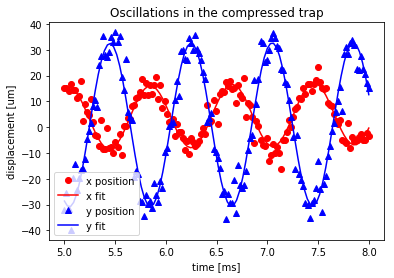

In [46]:
#from pylab import *
from scipy import *
    
# Generate data points with noise
num_points = 150
# time: 
Tx = np.linspace(5., 8., num_points)
Ty = Tx

# simulated dependent variables: 
tX = 11.86*cos(2*pi/0.81*Tx-1.32) + 0.64*Tx+4*((0.5-rand(num_points))*exp(2*rand(num_points)**2))
tY = -32.14*cos(2*pi/0.8*Ty-1.94) + 0.15*Ty+7*((0.5-rand(num_points))*exp(2*rand(num_points)**2))
    
# Fit the first set
fitfunc = lambda p, x: p[0]* cos(2*pi/p[1]*x+p[2]) + p[3]*x # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [-15., 0.8, 0., -1.] # Initial guess for the parameters
p1, success = leastsq(func = errfunc, x0= p0[:], args=(Tx, tX))  # fit model and estimate parameters

# plot the first set: 
time = linspace(start= Tx.min(), stop= Tx.max(), num= 100)
plt.plot(Tx, tX, "ro", time, fitfunc(p1, time), "r-") # Plot of the data and the fit

# Fit the second set
p0 = [-15., 0.8, 0., -1.]  # Initial guess for the parameters
p2, success = leastsq(errfunc, p0[:], args=(Ty, tY))         # fit model and estimate parameters

# plot the second set: 
time = linspace(Ty.min(), Ty.max(), 100)
plt.plot(Ty, tY, "b^", time, fitfunc(p2, time), "b-")

# Legend the plot
plt.title("Oscillations in the compressed trap")
plt.xlabel("time [ms]")
plt.ylabel("displacement [um]")
plt.legend(('x position', 'x fit', 'y position', 'y fit'))

#plt.text(0.8, 0.07,'x freq :  %.3f kHz \n y freq :  %.3f kHz' % (1/p1[1],1/p2[1]),
#     fontsize=16, horizontalalignment='center', verticalalignment='center' )

In [17]:

    # a = opt.fmin(f, 1)
    # b = opt.fmin_cg(f, 1)
    # c = opt.fmin_bfgs(f, 1)
    # print a, 1/a, math.e
    # print b
    # print c

In [ ]:
   # 8.1 scipy
    # 线性回归例1
    # x = np.linspace(-2, 2, 50)
    # A, B, C = 2, 3, -1
    # y = (A * x ** 2 + B * x + C) + np.random.rand(len(x))*0.75
    #
    # t = leastsq(residual, [0, 0, 0], args=(x, y))
    # theta = t[0]
    # print '真实值：', A, B, C
    # print '预测值：', theta
    # y_hat = theta[0] * x ** 2 + theta[1] * x + theta[2]
    # plt.plot(x, y, 'r-', linewidth=2, label=u'Actual')
    # plt.plot(x, y_hat, 'g-', linewidth=2, label=u'Predict')
    # plt.legend(loc='upper left')
    # plt.grid()
    # plt.show()

    # # 线性回归例2
    # x = np.linspace(0, 5, 100)
    # a = 5
    # w = 1.5
    # phi = -2
    # y = a * np.sin(w*x) + phi + np.random.rand(len(x))*0.5
    #
    # t = leastsq(residual2, [3, 5, 1], args=(x, y))
    # theta = t[0]
    # print '真实值：', a, w, phi
    # print '预测值：', theta
    # y_hat = theta[0] * np.sin(theta[1] * x) + theta[2]
    # plt.plot(x, y, 'r-', linewidth=2, label='Actual')
    # plt.plot(x, y_hat, 'g-', linewidth=2, label='Predict')
    # plt.legend(loc='lower left')
    # plt.grid()
    # plt.show()



    # marker	description
    # ”.”	point
    # ”,”	pixel
    # “o”	circle
    # “v”	triangle_down
    # “^”	triangle_up
    # “<”	triangle_left
    # “>”	triangle_right
    # “1”	tri_down
    # “2”	tri_up
    # “3”	tri_left
    # “4”	tri_right
    # “8”	octagon
    # “s”	square
    # “p”	pentagon
    # “*”	star
    # “h”	hexagon1
    # “H”	hexagon2
    # “+”	plus
    # “x”	x
    # “D”	diamond
    # “d”	thin_diamond
    # “|”	vline
    # “_”	hline
    # TICKLEFT	tickleft
    # TICKRIGHT	tickright
    # TICKUP	tickup
    # TICKDOWN	tickdown
    # CARETLEFT	caretleft
    # CARETRIGHT	caretright
    # CARETUP	caretup
    # CARETDOWN	caretdown